<a href="https://colab.research.google.com/github/Sourav1429/pReinforce/blob/main/pReinforce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

In [ ]:
def set_up_env_river_swim(nS=6,nA=2):
  P=np.zeros((nA,nS,nS));
  R=np.zeros((nA,nS,nS));
  P[0,0,0]=1
  for i in range(1,nS-1):
    P[0,i,i-1]=1;
    P[1,i,i-1]=0.1;
    P[1,i,i]=0.6
    P[1,i,i+1]=0.3
  P[0,5,4],P[1,5,4],P[1,5,5]=1,0.1,0.9;
  R[0,0,0]=5/1000.
  R[1,5,4],R[1,5,5] = 1,1
  P[1,0,0] = 0.3;P[1,0,1] = 0.7
  s_start = 5
  print(P)
  print(R)
  return P,R,s_start;

In [ ]:
def softmax(rho):
  exponent = np.exp(rho);
  exponent = exponent/np.sum(exponent);
  return exponent;

In [ ]:
def update_probs(rho,theta,k,alpha):
  grad_vector=np.empty(len(theta));
  sum=np.sum(np.exp(theta));
  sum2=np.sum(np.exp(rho));
  for i in range(len(theta)):
    if(i==k):
      grad_vector[i] = (1-np.exp(grad_vector[i])/sum);
    else:
      grad_vector[i]= -np.exp(grad_vector[i])/sum;
  #print("Grad vector:",grad_vector)
  #print("update value:",np.exp(rho)/sum2*grad_vector)
  #print(np.dot(rho,grad_vector)*np.exp(rho)/sum2)
  theta=theta+alpha*np.dot(rho,grad_vector)*np.exp(rho)/sum2
  #print(theta)
  return theta;


In [ ]:
def pReinforce(P,nA,nS,R,k_pol,s_start,T,runs,tau,lr=0.01):
  policy_played=np.zeros((runs,len(k_pol)));
  rew = np.zeros(T);probs=None;
  for run in range(runs):
    #rho=np.ones(len(k_pol))/len(k_pol) #equal probabilities for all policies
    rho=np.zeros(len(k_pol));
    probs=np.array([0.11,0.1,0.03,0.08,0.1,0.58]);
    #probs=softmax(rho);
    t_dash = 0;
    s=s_start;
    reward=0;
    r_dash=0;
    k=np.random.choice(len(k_pol),p=probs);
    rew_dash=np.zeros(len(k_pol))
    time=np.zeros(len(k_pol))
    policy_played[run][k]+=1;
    for t in range(T):
      if((t!=0 and s==s_start) or (t_dash>=tau)):
        rew_dash[k]+=r_dash;
        time[k]+=t_dash;
        rho[k]=rew_dash[k]/time[k];
        probs=update_probs(rho,probs,k,lr);
        #print(t,"====>",probs)
        k=np.random.choice(len(k_pol),p=softmax(probs))
        policy_played[run][k]+=1;
        r_dash = 0;
        t_dash = 0;
      #choose action
      a=k_pol[k][s];
      #print(a)
      s_next=np.argmax(np.random.multinomial(1,P[a,s,:]))
      #print("next state=",s_next)
      reward = R[a,s,s_next];
      #print(reward)
      s=s_next;
      t_dash+=1;
      rew[t]+=reward
      r_dash = r_dash + reward;
    rew=rew/runs;
  return rew,policy_played,probs;

In [ ]:
nS = 6;
nA = 2;S=np.arange(nS);
A = np.array([0,1])
P=np.zeros((nA,nS,nS));
R=np.zeros((nA,nS,nS));
P,R,start = set_up_env_river_swim();

runs=20
tau_reinf =50
T = 100000;
beta = 1
optimal = 0.662375
lr=0.05
'''K_pol=np.array([[0,0,0,0],
                [0,0,0,1],
                [0,0,1,1],
                [0,1,1,1],
                [1,1,1,1]])'''
K_pol=np.array([[0,0,0,0,0,1],
                [0,0,0,0,1,1],
                [0,0,0,1,1,1],
                [0,0,1,1,1,1],
                [0,1,1,1,1,1],
                [1,1,1,1,1,1]])
'''action_prob=np.array([[0.8,0.2],
                      [0.5,0.5],
                      [0.5,0.5],
                      [0.6,0.4],
                      [0.4,0.6],
                      [0.2,0.8]]);'''

[[[1.  0.  0.  0.  0.  0. ]
  [1.  0.  0.  0.  0.  0. ]
  [0.  1.  0.  0.  0.  0. ]
  [0.  0.  1.  0.  0.  0. ]
  [0.  0.  0.  1.  0.  0. ]
  [0.  0.  0.  0.  1.  0. ]]

 [[0.3 0.7 0.  0.  0.  0. ]
  [0.1 0.6 0.3 0.  0.  0. ]
  [0.  0.1 0.6 0.3 0.  0. ]
  [0.  0.  0.1 0.6 0.3 0. ]
  [0.  0.  0.  0.1 0.6 0.3]
  [0.  0.  0.  0.  0.1 0.9]]]
[[[0.005 0.    0.    0.    0.    0.   ]
  [0.    0.    0.    0.    0.    0.   ]
  [0.    0.    0.    0.    0.    0.   ]
  [0.    0.    0.    0.    0.    0.   ]
  [0.    0.    0.    0.    0.    0.   ]
  [0.    0.    0.    0.    0.    0.   ]]

 [[0.    0.    0.    0.    0.    0.   ]
  [0.    0.    0.    0.    0.    0.   ]
  [0.    0.    0.    0.    0.    0.   ]
  [0.    0.    0.    0.    0.    0.   ]
  [0.    0.    0.    0.    0.    0.   ]
  [0.    0.    0.    0.    1.    1.   ]]]


'action_prob=np.array([[0.8,0.2],\n                      [0.5,0.5],\n                      [0.5,0.5],\n                      [0.6,0.4],\n                      [0.4,0.6],\n                      [0.2,0.8]]);'

In [ ]:
rew,n,probs = pReinforce(P,nA,nS,R,K_pol,start,T,runs,tau_reinf,lr)#P,nA,nS,R,k_pol,s_start,T,runs,tau,action_prob,lr=0.01

In [ ]:
print(np.sum(rew))

61584.39


In [ ]:
print(n);

[[  388.   457.   499.   659.   850. 58872.]]


In [ ]:
print(probs);

[258.66395379 274.24051929 302.37734092 307.77647549 350.1722562
 444.76657566]


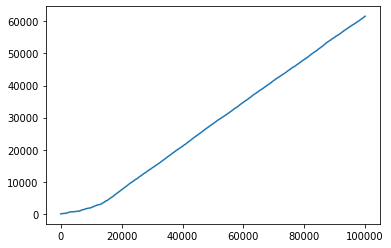

In [ ]:
plt.plot(np.cumsum(rew))

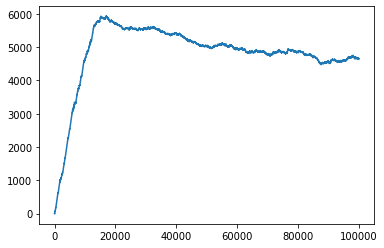

In [ ]:
reg = optimal*np.arange(1,T+1)-np.cumsum(rew)
plt.plot(reg)

In [ ]:
def pThompson(S,A,P,R,s_start,tau,T,runs,K):
  rew=np.zeros(T);
  rho=np.zeros(len(K));
  print("Computing pThompson Algorithm:");
  for run in tqdm(range(runs)):
    S=np.ones(len(K));
    F=np.ones(len(K));
    s=s_start
    r=0;
    t_dash=0;
    k=np.random.choice(len(K));
    for t in range(T):
      if((t!=0 and s==s_start)or(t_dash>=tau)):
        S[k]=S[k]+r;
        F[k]=F[k]+t_dash-r;
        theta=[np.random.beta(S[j],F[j]) for j in range(len(K))]
        k=np.argmax(theta);
        t_dash=0;
        r=0;
      s_next=np.argmax(np.random.multinomial(1,P[K[k,s],s,:]));
      reward=R[K[k,s],s,s_next];
      r=r+reward
      t_dash+=1;
      s=s_next;
      rew[t]=rew[t]+reward;
    mean = np.array([S[j]/(S[j]+F[j]) for j in range(len(K))]);
    print(mean);
    rho=rho+mean;
  rew=rew/runs;
  rho=rho/runs;
  return rew,rho;

In [ ]:
def pUCB(S,A,P,R,beta,tau,T,runs,K,s_start):
    reg_arr = np.zeros(T);
    rho = None;
    rew=np.zeros(T);
    mean = np.zeros(len(K))
    #choice_pol=np.zeros(len(K))
    print("Computing pUCB algorithm:");
    for run in tqdm(range(runs)):
        s=s_start;
        t_dash = 0;
        r=0;
        k=np.random.choice(len(K));
        #print(k)
        n = np.zeros(len(K));
        Rk=np.zeros(len(K));
        Tk=np.zeros(len(K));
        rho=np.zeros(len(K));
        c=np.zeros(len(K));
        pol_played=1;
        for t in range(T):
            if((t!=0 and s==s_start) or t_dash>=tau):
                    Rk[k]=Rk[k]+r;
                    Tk[k]=Tk[k]+t_dash;
                    rho[k]=Rk[k]/Tk[k];
                    n[k]+=1;
                    c[k]=beta*np.sqrt(2*np.log(np.sum(n))/n[k])
                    if(pol_played<len(K)):
                      k=(k+1)%len(K);
                      pol_played+=1;
                    else:
                      k=np.argmax([rho[j]+c[j] for j in range(len(K))]);
                    #print(k);
                    t_dash = 0;
                    r=0;
            s_next=np.argmax(np.random.multinomial(1,P[K[k,s],s,:]))
            #print(s_next)
            reward=R[K[k,s],s,s_next];
            rew[t]=rew[t]+reward
            r=r+reward;
            t_dash=t_dash+1;
            s=s_next;
        print(rho,n)
        mean = mean + rho
    rew=rew/runs;
    mean=mean/runs
    return rew,mean,n

In [ ]:
rew_t,rho = pThompson(S,A,P,R,start,tau,T,runs,K_pol)#S,A,P,R,s_start,tau,T,runs,K
rew_u,rho2,n = pUCB(S,A,P,R,beta,tau,T,runs,K_pol,start);#S,A,P,R,beta,tau,T,runs,K,s_start
print("Printing means for pThompson:",rho)
print("Printing means for pUCB:",rho2)
reg_t = optimal*np.arange(1,T+1) - np.cumsum(rew_t);
reg_u = optimal*np.arange(1,T+1) - np.cumsum(rew_u);

Computing pThompson Algorithm:


100%|██████████| 1/1 [00:03<00:00,  3.72s/it]


[0.06561033 0.07589286 0.12594002 0.08653846 0.07589286 0.66533551]
Computing pUCB algorithm:


100%|██████████| 1/1 [00:04<00:00,  4.06s/it]

[0.0266347  0.02972623 0.05387748 0.44445364 0.03512397 0.65144703] [   89.    88.    98. 10638.    90. 44821.]
Printing means for pThompson: [0.06561033 0.07589286 0.12594002 0.08653846 0.07589286 0.66533551]
Printing means for pUCB: [0.0266347  0.02972623 0.05387748 0.44445364 0.03512397 0.65144703]


Text(0.5, 1.0, 'Regret plot comparison between pThompson,pUCB and pReinforce')

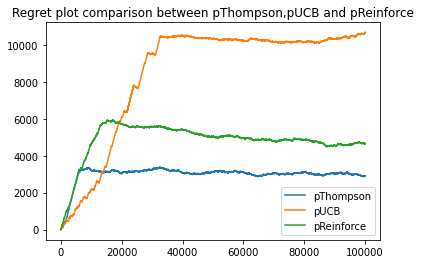

In [ ]:
plt.plot(reg_t);
plt.plot(reg_u);
plt.plot(reg)
plt.legend(['pThompson','pUCB','pReinforce'])
plt.title('Regret plot comparison between pThompson,pUCB and pReinforce')

In [ ]:
plt.plot(np.cumsum(rew_t));
plt.plot(np.cumsum(rew_u));
plt.plot(np.cumsum(ucrl_dat['average']));
plt.plot(np.cumsum(psrl_dat['average']));
plt.plot(np.cumsum(rew))
plt.legend(['pThompson','pUCB','UCRL','PSRL','pReinforce without baseline'])